Dataset cargado correctamente: 1806 filas, 32 columnas

Variables después del one-hot encoding: 56 columnas

Entrenamiento: 1444 muestras | Prueba: 362 muestras

Modelo Random Forest entrenado correctamente.

=== Reporte de Clasificación ===


,precision,recall,f1-score,support
CANDIDATE,0.781,0.893,0.833,196.000
CONFIRMED,0.832,0.724,0.774,116.000
FALSE POSITIVE,0.838,0.646,0.729,48.000
REFUTED,0.000,0.000,0.000,2.000
accuracy,0.801,0.801,0.801,0.801
macro avg,0.613,0.566,0.584,362.000
weighted avg,0.801,0.801,0.796,362.000



=== Matriz de Confusión ===


,Pred: CANDIDATE,Pred: CONFIRMED,Pred: FALSE POSITIVE,Pred: REFUTED
Real: CANDIDATE,175,15,6,0
Real: CONFIRMED,32,84,0,0
Real: FALSE POSITIVE,16,1,31,0
Real: REFUTED,1,1,0,0


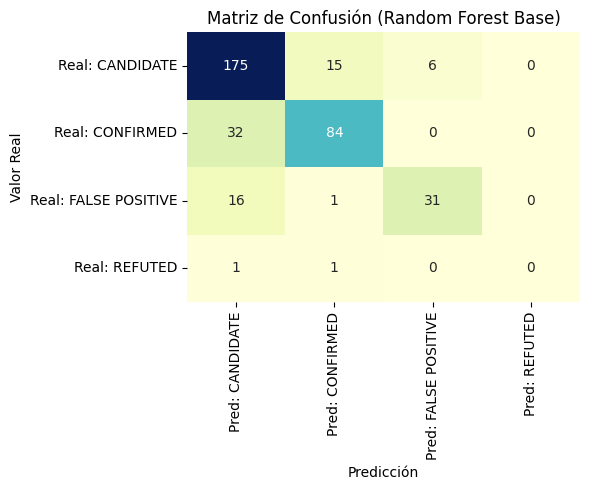

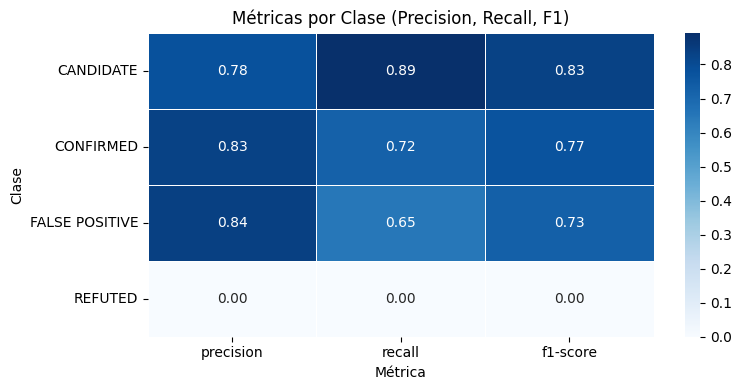

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# 1️⃣ Cargar datos
df = pd.read_csv("df_clean.csv")
print(f"Dataset cargado correctamente: {df.shape[0]} filas, {df.shape[1]} columnas\n")

# 2️⃣ Separar features y target
X = df.drop(columns=["pl_name", "disposition"])
y = df["disposition"]

# 3️⃣ Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)
print(f"Variables después del one-hot encoding: {X.shape[1]} columnas\n")

# 4️⃣ Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Entrenamiento: {X_train.shape[0]} muestras | Prueba: {X_test.shape[0]} muestras\n")

# 5️⃣ Escalado (opcional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ Entrenar modelo base
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
print("Modelo Random Forest entrenado correctamente.\n")

# 7️⃣ Evaluar desempeño
y_pred = model.predict(X_test)
report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
report = report.round(3)

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=model.classes_),
    index=[f"Real: {c}" for c in model.classes_],
    columns=[f"Pred: {c}" for c in model.classes_]
)

# === Reporte en tabla ===
print("=== Reporte de Clasificación ===")
display(report.style
        .set_table_styles([
            {"selector": "thead", "props": [("background-color", "#002B5B"), ("color", "white"), ("font-weight", "bold")]},
            {"selector": "tbody td", "props": [("border", "1px solid #ccc"), ("padding", "5px")]}
        ])
        .format("{:.3f}")
        .set_caption("Desempeño del modelo por clase"))

print("\n=== Matriz de Confusión ===")
display(cm.style
        .set_table_styles([
            {"selector": "thead", "props": [("background-color", "#1b4965"), ("color", "white"), ("font-weight", "bold")]},
            {"selector": "tbody td", "props": [("border", "1px solid #aaa"), ("padding", "5px")]}
        ])
        .set_caption("Distribución de predicciones vs valores reales")
        .background_gradient(cmap="YlGnBu"))

# === Visualizaciones complementarias ===
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Matriz de Confusión (Random Forest Base)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.heatmap(report.iloc[:-3, :-1], annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Métricas por Clase (Precision, Recall, F1)")
plt.xlabel("Métrica")
plt.ylabel("Clase")
plt.tight_layout()
plt.show()


=== Principales 20 variables más influyentes ===


,Importancia
pl_tranmid,0.087206
st_raderr2,0.063704
disc_year,0.063251
st_raderr1,0.061959
rv_flag,0.049772
sy_dist,0.048678
pl_orbper,0.048227
dec,0.040815
glat,0.039231
st_rad,0.038778


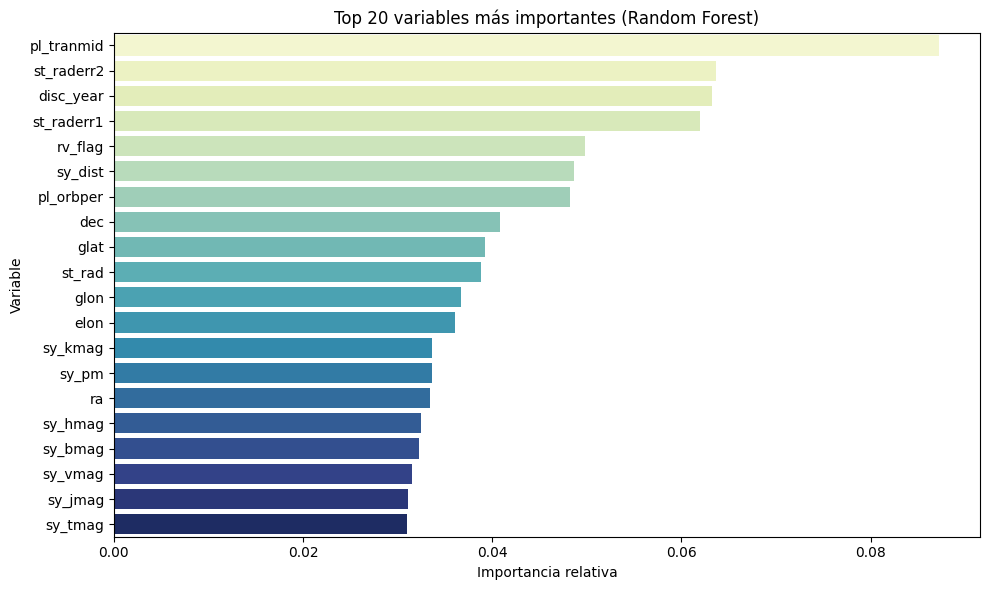


Variables con baja influencia (menor a 0.002): 31


,Importancia
disc_facility_K2,0.001660
disc_telescope_0.95 m Kepler Telescope,0.001592
disc_instrument_Apogee 4K CCD Sensor,0.000332
disc_facility_HATSouth,0.000298
discoverymethod_Transit,0.000155
tran_flag,0.000078
micro_flag,0.000078
disc_facility_Multiple Observatories,0.000049
disc_telescope_Canon 200mm f/1.8L,0.000047
disc_telescope_Multiple Telescopes,0.000042


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Importancia de características ===
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Top 20 más importantes
top_features = importances.head(20)
print("=== Principales 20 variables más influyentes ===")
display(top_features.to_frame("Importancia").style
        .background_gradient(cmap="YlGnBu")
        .set_properties(**{"border": "1px solid #ccc"})
        .set_caption("Importancia de características en el modelo Random Forest"))

# === Gráfica de importancia ===
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="YlGnBu")
plt.title("Top 20 variables más importantes (Random Forest)")
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# === Variables con poca o nula relevancia ===
low_features = importances[importances < 0.002]
print(f"\nVariables con baja influencia (menor a 0.002): {len(low_features)}")
display(low_features.to_frame("Importancia").head(20))


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# === 1️⃣ Cargar dataset original ===
df = pd.read_csv("df_clean.csv")
print(f"Dataset original: {df.shape[0]} filas, {df.shape[1]} columnas")

# === 2️⃣ Seleccionar variables más relevantes ===
cols_relevantes = [
    "pl_tranmid", "st_rad", "st_raderr1", "st_raderr2",
    "rv_flag", "pl_orbper", "sy_dist",
    "sy_vmag", "sy_kmag", "sy_pm",
    "disc_year", "glon", "glat", "ra", "dec",
    "disposition", "pl_name"
]

df_reduced = df[cols_relevantes].copy()
print(f"Dataset reducido: {df_reduced.shape[0]} filas, {df_reduced.shape[1]} columnas\n")

# === 3️⃣ Separar variables ===
X = df_reduced.drop(columns=["pl_name", "disposition"])
y = df_reduced["disposition"]

# === 4️⃣ Codificar y escalar ===
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 5️⃣ División en train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Entrenamiento: {X_train.shape[0]} | Prueba: {X_test.shape[0]} muestras\n")

# === 6️⃣ Entrenamiento con las variables clave ===
model_reduced = RandomForestClassifier(n_estimators=200, random_state=42)
model_reduced.fit(X_train, y_train)
print("Modelo reentrenado con variables seleccionadas.\n")

# === 7️⃣ Evaluación ===
y_pred_reduced = model_reduced.predict(X_test)
report_reduced = pd.DataFrame(classification_report(y_test, y_pred_reduced, output_dict=True)).transpose().round(3)
cm_reduced = pd.DataFrame(
    confusion_matrix(y_test, y_pred_reduced, labels=model_reduced.classes_),
    index=[f"Real: {c}" for c in model_reduced.classes_],
    columns=[f"Pred: {c}" for c in model_reduced.classes_]
)

# === Mostrar resultados ===
print("=== Desempeño del modelo reducido ===")
display(report_reduced)

print("\n=== Matriz de confusión ===")
display(cm_reduced)


Dataset original: 1806 filas, 32 columnas
Dataset reducido: 1806 filas, 17 columnas

Entrenamiento: 1444 | Prueba: 362 muestras

Modelo reentrenado con variables seleccionadas.

=== Desempeño del modelo reducido ===


,precision,recall,f1-score,support
CANDIDATE,0.797,0.903,0.847,196.000
CONFIRMED,0.845,0.750,0.795,116.000
FALSE POSITIVE,0.838,0.646,0.729,48.000
REFUTED,0.000,0.000,0.000,2.000
accuracy,0.815,0.815,0.815,0.815
macro avg,0.620,0.575,0.593,362.000
weighted avg,0.813,0.815,0.810,362.000



=== Matriz de confusión ===


,Pred: CANDIDATE,Pred: CONFIRMED,Pred: FALSE POSITIVE,Pred: REFUTED
Real: CANDIDATE,177,13,6,0
Real: CONFIRMED,29,87,0,0
Real: FALSE POSITIVE,15,2,31,0
Real: REFUTED,1,1,0,0


=== Principales 15 variables más influyentes (modelo reducido) ===


,Importancia
pl_tranmid,0.116609
disc_year,0.091576
st_raderr2,0.082586
st_raderr1,0.082577
rv_flag,0.069610
sy_dist,0.064291
pl_orbper,0.062114
dec,0.058849
glat,0.057550
sy_kmag,0.055323


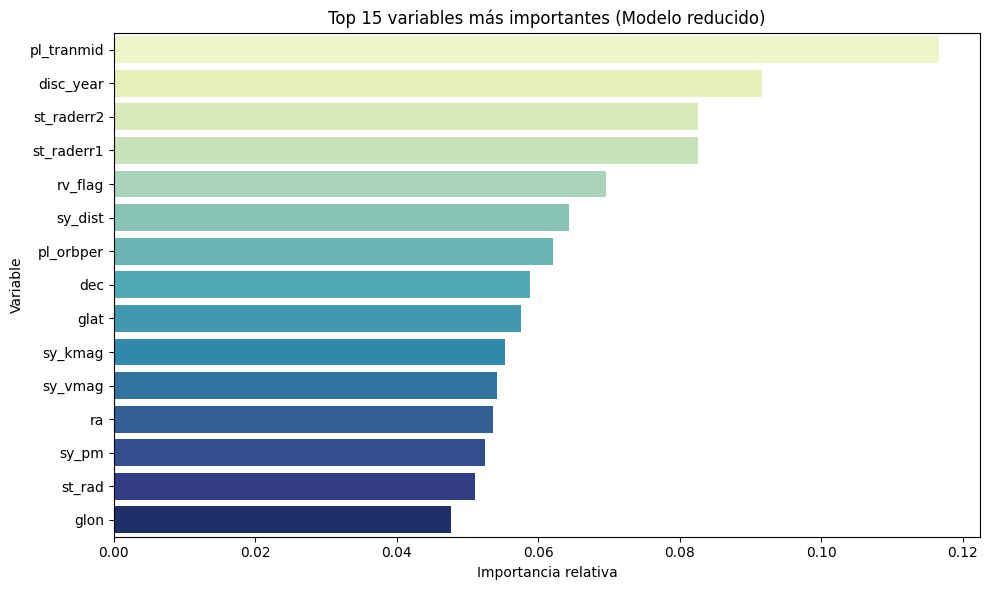

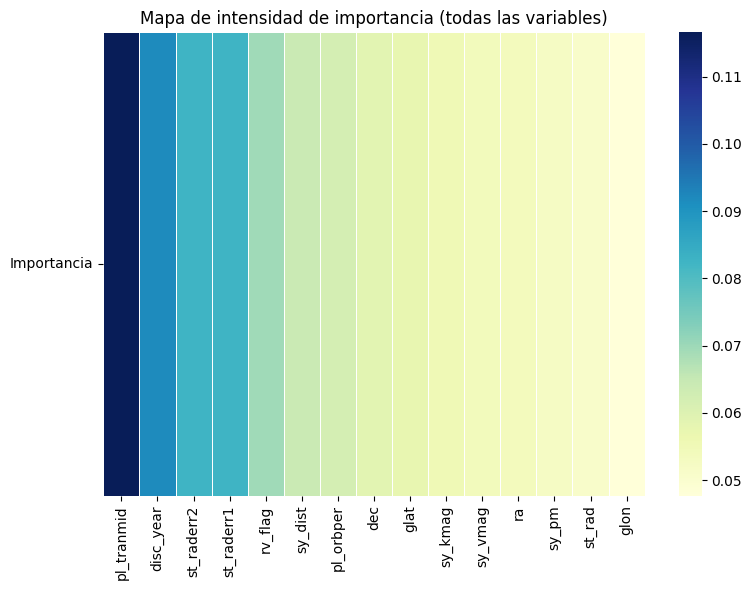


Variables con baja influencia (< 0.01): 0


,Importancia


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Importancia de variables (modelo reducido) ===
importances_reduced = pd.Series(model_reduced.feature_importances_, index=X.columns)
importances_reduced = importances_reduced.sort_values(ascending=False)

# Top 15 más importantes
top_features_reduced = importances_reduced.head(15)
print("=== Principales 15 variables más influyentes (modelo reducido) ===")
display(top_features_reduced.to_frame("Importancia").style
        .background_gradient(cmap="YlGnBu")
        .set_properties(**{"border": "1px solid #ccc"})
        .set_caption("Importancia de características en el modelo reducido"))

# === Gráfico: Top 15 variables ===
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features_reduced.values, y=top_features_reduced.index, palette="YlGnBu")
plt.title("Top 15 variables más importantes (Modelo reducido)")
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# === Heatmap completo de correlación de importancias ===
plt.figure(figsize=(8, 6))
sns.heatmap(importances_reduced.to_frame("Importancia").T, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Mapa de intensidad de importancia (todas las variables)")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# === Variables de baja influencia (< 0.01) ===
low_features_reduced = importances_reduced[importances_reduced < 0.01]
print(f"\nVariables con baja influencia (< 0.01): {len(low_features_reduced)}")
display(low_features_reduced.to_frame("Importancia").head(15))


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Suponiendo que ya tienes: y_test, y_pred
# y que tu modelo (RandomForest) ya fue entrenado

# 1️⃣ Métricas globales
acc = accuracy_score(y_test, y_pred)
precision_w = precision_score(y_test, y_pred, average='weighted')
recall_w = recall_score(y_test, y_pred, average='weighted')
f1_w = f1_score(y_test, y_pred, average='weighted')
precision_m = precision_score(y_test, y_pred, average='macro')
recall_m = recall_score(y_test, y_pred, average='macro')
f1_m = f1_score(y_test, y_pred, average='macro')

# 2️⃣ Tabla por clase
report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
report = report.round(3)

# 3️⃣ Imprimir resultados
print("=== Métricas Globales del Modelo ===")
print(f"Accuracy:           {acc:.3f}")
print(f"Precision (weighted): {precision_w:.3f}")
print(f"Recall (weighted):    {recall_w:.3f}")
print(f"F1-score (weighted):  {f1_w:.3f}")
print(f"Precision (macro):    {precision_m:.3f}")
print(f"Recall (macro):       {recall_m:.3f}")
print(f"F1-score (macro):     {f1_m:.3f}")
print("\n=== Reporte Detallado por Clase ===")
display(report.style
        .set_caption("Desempeño del modelo por clase")
        .set_table_styles([
            {"selector": "thead", "props": [("background-color", "#002B5B"), ("color", "white"), ("font-weight", "bold")]},
            {"selector": "tbody td", "props": [("border", "1px solid #ccc"), ("padding", "5px")]}
        ])
        .format("{:.3f}"))


=== Métricas Globales del Modelo ===
Accuracy:           0.801
Precision (weighted): 0.801
Recall (weighted):    0.801
F1-score (weighted):  0.796
Precision (macro):    0.613
Recall (macro):       0.566
F1-score (macro):     0.584

=== Reporte Detallado por Clase ===


,precision,recall,f1-score,support
CANDIDATE,0.781,0.893,0.833,196.000
CONFIRMED,0.832,0.724,0.774,116.000
FALSE POSITIVE,0.838,0.646,0.729,48.000
REFUTED,0.000,0.000,0.000,2.000
accuracy,0.801,0.801,0.801,0.801
macro avg,0.613,0.566,0.584,362.000
weighted avg,0.801,0.801,0.796,362.000
